# 超参选择与模型验证

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.cross_validation import train_test_split
xtr,xte,ytr,yte=train_test_split(X,y,random_state=0,train_size=0.7)

e:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [4]:
model.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [5]:
from sklearn.metrics import accuracy_score
ypdt=model.predict(xte)
accuracy_score(yte,ypdt)

0.9777777777777777

In [6]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model,X,y,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [8]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
# 随机轴样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

In [9]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置图形样式

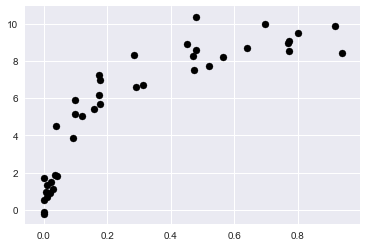

In [10]:
fig=plt.figure()
plt.scatter(X,y,color='black')

In [11]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
X_test

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

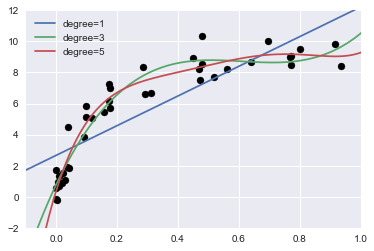

In [12]:
axis = plt.axis()
plt.scatter(X,y,color='black')
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test, y_test, label='degree={0}'.format(degree))
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc='best');

e:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


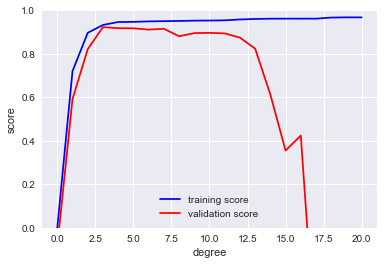

In [13]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

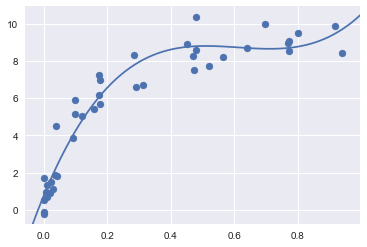

In [14]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

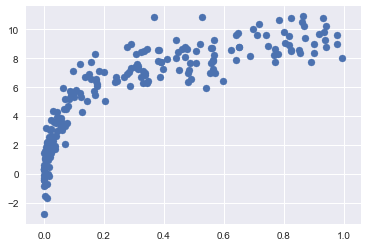

In [15]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

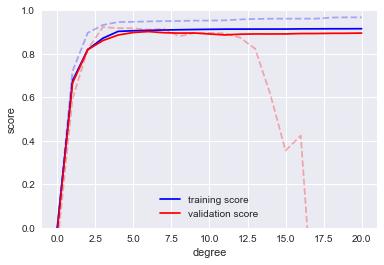

In [16]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
'polynomialfeatures__degree',
degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

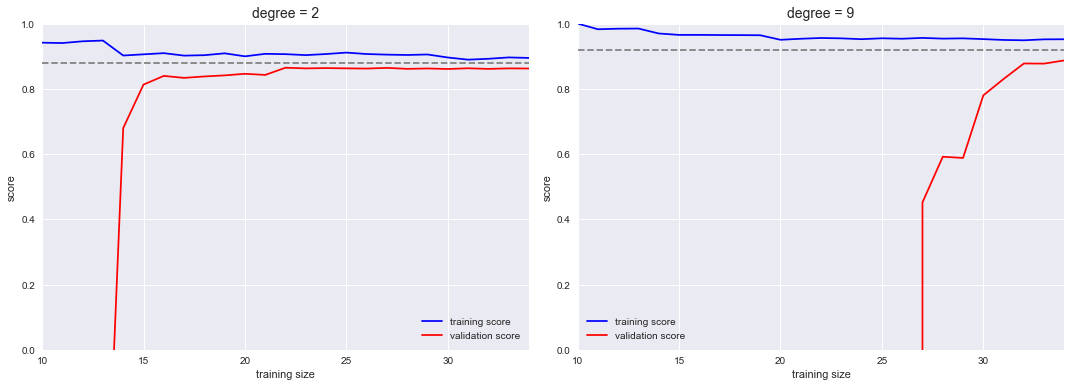

In [21]:
from sklearn.learning_curve import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
    linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

# 网格搜索

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [24]:
grid.fit(X, y);

In [25]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

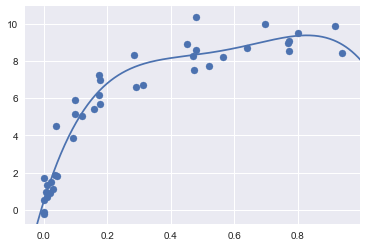

In [27]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);